# FIT5196 Assessment 3
#### Student Name: DISHI JAIN
#### Student ID: 30759307


Libraries used:

* from __future__ import division, unicode_literals 
* import codecs
* from bs4 import BeautifulSoup
* import pandas as pd
* import datetime
* import json


* from math import sin, cos, sqrt, atan2, radians
* import tabula
#!pip install tabula-py
#conda install -c conda-forge tabula-py
* import xmltodict
* from tabula import read_pdf


* import numpy
* import matplotlib 
%matplotlib inline
* import shapefile
* import matplotlib.pyplot as plt
* import matplotlib.patches as patches
* from matplotlib.patches import Polygon
* from matplotlib.collections import PatchCollection
* import shapely
* from shapely.geometry import Point



## 1. Introduction
In this assignment we are required to complete two tasks. Here we are required to extract data from different file formats like pdf,xml,,etc. Hence handling of such files are needed in tis assignment. After this handling we are also required to perform certain mathematical and geographical calculations to determine nearest stops to a property. These stops could be shoppig centers, train stations, etc. In this assignment we are also required to reshape the data and perform certain normalisatons and transformtions on the data to prepare it in a manner such that it can fit into a Linear model more accurately. 

## 2. Importing Libraries

In [1]:

from __future__ import division, unicode_literals 
import codecs
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import json


from math import sin, cos, sqrt, atan2, radians
import tabula
#!pip install tabula-py
# conda install -c conda-forge tabula-py
import xmltodict
from tabula import read_pdf


import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapely
from shapely.geometry import Point




## 3. Task - 1

## 4. Reading Files given to us

In [2]:
##HOSPTALS.html

#creating html object
object_hos = codecs.open("hospitals.html", 'r', 'utf-8')
bsobj = BeautifulSoup(object_hos, "lxml")

#extrcating the dataframe class 
table_hos = bsobj.find("table", attrs={"class": "dataframe"})
column_name_hospital = []

#extractng the column names
for value in table_hos.find_all("thead"):
    column_name_hospital.append(value.text)
column_name_hospital = column_name_hospital[0].replace("\n"," ").split()

table_data_hos = table_hos.tbody.find_all("tr")  

#getting the values for each column and each row
final_hos_values = []
for td in table_data_hos:
    rows = []
    for x in td.find_all("td"):
        rows.append(x.text)
    final_hos_values.append(rows)

#creating a dataframe with extracted values nd column name
df_hospitals = pd.DataFrame(final_hos_values, columns = column_name_hospital)
df_hospitals

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital
...,...,...,...,...
194,hospital_195,-38.234091,146.406812,Maryvale Private Hospital
195,hospital_196,-37.837972,144.996182,South Yarra Clinic
196,hospital_197,-37.798231,144.957169,Prof George Andrew Varigos Specialist Practice
197,hospital_198,-37.910968,144.990415,Mr Harry Clitherow - Orthopaedic Surgeon


In [3]:
##REAL_STATE.JSON

#reading the .json file
with open('real_state.json') as object_json:
    real_state_values = json.load(object_json)

#converting the data to a dataframe
df_real_state_json = pd.DataFrame(real_state_values)
df_real_state_json

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,22330,-37.734074,144.950119,23 Autumn Street,6975000,house,2008,3,1,2
1,3356,-37.819398,144.872259,317 Francis Street,8866000,house,2016,3,1,1
2,47071,-37.710718,145.170369,34 Onkara Court,6200000,house,2013,3,2,2
3,4247,-37.834900,144.871481,20 Bruce Street,9144000,house,2016,2,1,2
4,79707,-37.998808,145.150152,15 Len George Drive,13860000,house,2015,4,3,2
...,...,...,...,...,...,...,...,...,...,...
1005,43479,-37.712109,145.088180,14 Longmuir Road,3350000,house,2008,2,1,0
1006,31160,-37.752086,144.992025,34 Keon Street,8268000,house,2012,2,1,1
1007,52796,-37.820178,144.989919,249 Punt Road,15750000,house,2016,4,1,0
1008,54366,-37.812683,145.017370,3 Elm Street,12250000,house,2012,3,1,0


In [4]:
##REAL_STATE.xml

#creating object for xml file
object_real_state_xml = open("real_state.xml" , "r")
real_state = object_real_state_xml.read()

#slicing the string to achieve parsing of data
real_state = real_state[2:-1]

#creating an xml to dict object
dictionary_real_state_xml = xmltodict.parse(real_state)

#column names extraction
colname_real_state_xml = list(dictionary_real_state_xml['root'].keys())
list_of_col_vals = []

#extracting the values for each column using #text parameter
for colname in colname_real_state_xml:
    individual_col_vals = []
    for i in dictionary_real_state_xml['root'][colname]:
        if dictionary_real_state_xml['root'][colname][i] != 'dict':
            individual_col_vals.append(dictionary_real_state_xml['root'][colname][i]['#text'])
    list_of_col_vals.append(individual_col_vals)
    

#creating a dataframe and transposing to get the desired shape
df_real_state_xml = pd.DataFrame(list_of_col_vals)
df_real_state_xml = df_real_state_xml.transpose()

#giving the column name values
df_real_state_xml.columns = colname_real_state_xml
df_real_state_xml


,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,62499,-37.82981873,145.23452759999998,107 Erica Court,9570000,house,2009,5,3,2
1,43409,-37.70275116,145.0859375,1/278 Grimshaw Street,6570000,house,2009,3,2,1
2,60071,-37.8119173,145.19473430000002,5/45 Doncaster East Road,8432000,house,2013,3,2,2
3,21365,-37.761068,144.959665,56 Frederick Street,6852000,house,2009,2,1,0
4,33531,-37.697157000000004,145.00651299999998,10 Morris Street,9945000,house,2015,3,1,1
...,...,...,...,...,...,...,...,...,...,...
1002,60227,-37.814457,145.212694,7 Prince Edward Avenue,8200000,house,2013,3,1,2
1003,50347,-37.768295,145.091265,63 Pinnacle Crescent,17500000,house,2016,4,3,2
1004,91454,-37.985303,145.04805,24 Deauville Street,21000000,house,2014,3,1,1
1005,92358,-37.981627,145.075762,5C Avenza Street,9376000,house,2013,3,2,2


In [5]:
##SHOPINGCENTERS.PDF

#reading pdf file with all pages
shopping_listdfs = read_pdf("shopingcenters.pdf",pages='all')

#concatenating all dataframes in the list created
df_shopping = pd.concat(shopping_listdfs)

#removing Unnamed columns
df_shopping = df_shopping.loc[:, ~df_shopping.columns.str.match('Unnamed')]
df_shopping.reset_index(drop=True,inplace=True)
df_shopping

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451
...,...,...,...
114,SC_115,-38.014916,145.323404
115,SC_116,43.105259,-76.091619
116,SC_117,-38.005454,145.217573
117,SC_118,-37.486265,144.589067


In [6]:
## 5

##SUPERMARKETS.XLSX

#reading .xlsx file with sheet as 1
df_supermarket = pd.read_excel('supermarkets.xlsx', sheet_name='Sheet1')

#removing the unnamed columns
df_supermarket = df_supermarket.loc[:, ~df_supermarket.columns.str.match('Unnamed')]
df_supermarket.reset_index(drop=True,inplace=True)
df_supermarket

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths
...,...,...,...,...
234,S_235,-37.860188,145.028920,Coles
235,S_236,-37.875984,144.614490,Coles
236,S_237,-37.047330,143.744610,Coles
237,S_238,-38.351648,144.922881,Coles


Finding repetitive ids in each dataframes created above. 

In [7]:
df_hospitals.id.value_counts()

hospital_149    1
hospital_106    1
hospital_057    1
hospital_198    1
hospital_102    1
               ..
hospital_095    1
hospital_075    1
hospital_104    1
hospital_112    1
hospital_022    1
Name: id, Length: 199, dtype: int64

In [8]:
df_supermarket.id.value_counts()

S_002    1
S_099    1
S_133    1
S_190    1
S_023    1
        ..
S_216    1
S_042    1
S_022    1
S_186    1
S_104    1
Name: id, Length: 239, dtype: int64

In [9]:
df_shopping.sc_id.value_counts()

SC_046    1
SC_045    1
SC_091    1
SC_058    1
SC_074    1
         ..
SC_067    1
SC_056    1
SC_073    1
SC_099    1
SC_052    1
Name: sc_id, Length: 119, dtype: int64

In [10]:
df_real_state_json.property_id.value_counts()

70298    2
32564    2
41284    2
21396    2
87256    2
        ..
85354    1
70649    1
14433    1
4640     1
88064    1
Name: property_id, Length: 1004, dtype: int64

In [11]:
df_real_state_xml.property_id.value_counts()

45858    1
96073    1
35693    1
31072    1
85133    1
        ..
68898    1
33591    1
4247     1
52214    1
90861    1
Name: property_id, Length: 1007, dtype: int64

Hence all dataframes have unique ids except for df_real_state_json. Checking the duplicate values and removing them below

In [12]:
df_real_state_json[df_real_state_json.duplicated()] 

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
594,41284,-37.705083,145.048955,9 Oakden Drive,4080000,house,2010,3,2,2
688,91899,-37.981657,145.059252,1 Ancona Street,14892000,house,2012,3,2,2
845,32564,-37.737894,145.021834,30 - 32 Lyonsville Avenue,19360000,house,2013,2,2,1
931,70298,-37.866285,145.098993,73 Barrington Drive,8320000,house,2014,3,2,2
958,87256,-37.944757,145.011331,1 Highett Road,22780000,house,2012,5,2,2
965,21396,-37.769791,144.963177,6 Bezzell Street,7335000,house,2015,2,1,0


Hence only df_real_state_json file has repetitive property_ids. To remove them we can use drop duplicate()

In [13]:
df_real_state_json.drop_duplicates(inplace=True)

In [14]:
df_real_state_json.property_id.value_counts()

45051    1
96943    1
4819     1
58066    1
68294    1
        ..
95599    1
17774    1
85354    1
70649    1
88064    1
Name: property_id, Length: 1004, dtype: int64

In [15]:
df_real_state_json[df_real_state_json.duplicated()] 

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space


Now no duplicate values exist in the dataframe

In [16]:
## FINAL DATA FRAME ALL COMBINED

#creating the real_state_dataframe with concatenation
real_state_combined = pd.concat([df_real_state_xml,df_real_state_json]).drop_duplicates().reset_index(drop=True)
real_state_combined

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,62499,-37.82981873,145.23452759999998,107 Erica Court,9570000,house,2009,5,3,2
1,43409,-37.70275116,145.0859375,1/278 Grimshaw Street,6570000,house,2009,3,2,1
2,60071,-37.8119173,145.19473430000002,5/45 Doncaster East Road,8432000,house,2013,3,2,2
3,21365,-37.761068,144.959665,56 Frederick Street,6852000,house,2009,2,1,0
4,33531,-37.697157000000004,145.00651299999998,10 Morris Street,9945000,house,2015,3,1,1
...,...,...,...,...,...,...,...,...,...,...
2006,43479,-37.7121,145.088,14 Longmuir Road,3350000,house,2008,2,1,0
2007,31160,-37.7521,144.992,34 Keon Street,8268000,house,2012,2,1,1
2008,52796,-37.8202,144.99,249 Punt Road,15750000,house,2016,4,1,0
2009,54366,-37.8127,145.017,3 Elm Street,12250000,house,2012,3,1,0


In [17]:
real_state_combined.property_id.value_counts()

45858    1
35871    1
84202    1
91295    1
74605    1
        ..
54910    1
2355     1
76530    1
76531    1
12292    1
Name: property_id, Length: 2011, dtype: int64

Hence only unique ids exists in the dataframe now

Now to calculate the minimum distance of each property to the nearest shopping center, train station, supermarket and hospital we use the below function. We can also use the function to get the ids of each shopping center, train station, supermarket and hospital.

In [18]:
#Function to find minimum distance and nearest id to given property


def distance_cal(lat1,lon1,df_new):
    final_dictionary_dis = {}
    
    #get column names
    column_names = list(df_new.columns)
    id_val = ''.join([s for s in column_names if "id" in s])
    lat_val = ''.join([s for s in column_names if "lat" in s])
    lng_val = ''.join([s for s in column_names if "lng" in s or "lon" in s])
    
    # given radius of earth in km
    R = 6378.0

    #converting lat long values to radian
    lat1 = radians(float(lat1))
    lon1 = radians(float(lon1))
    for index,i in enumerate(zip(df_new[lat_val],df_new[lng_val])):

        #converting lat long values to radian
        lat2 = radians(float(i[0]))
        lon2 = radians(float(i[1]))
        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        #variable to store distance from given point to propert lat long
        distance = R * c
        
        #dictionary to store distance and ids
        final_dictionary_dis.update({distance:df_new[id_val][index]})
    
    #finding minimum distance and respective ids
    min_distance = min(final_dictionary_dis)
    min_hos_id = final_dictionary_dis[min_distance]
    return min_hos_id,min_distance

    
# def euclidean_dist_cal(x1,y1,x2,y2):
#     return(sqrt((float(x2)-float(x1))**2 + (float(y2)-float(y1))**2))

In [19]:
#reading stops.txt file to get train stops

df_train_stations = pd.read_csv('stops.txt', sep=",")
df_train_stations.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [20]:
#setting default values for the column that need to be created

real_state_combined['Hospital_id'] = 'not_available'
real_state_combined['Distance_to_hospital'] = 0
real_state_combined['Shopping_center_id'] = 'not_available'
real_state_combined['Distance_to_sc'] = 0
real_state_combined['Supermarket_id'] = 'not_available'
real_state_combined['Distance_to_supermaket'] = 0
real_state_combined['Train_station_id'] = 0
real_state_combined['Distance_to_train_station'] = 0


In [21]:
#calling the function to get minimum distance and respective ids and filling the respective column values

real_state_combined['Hospital_id'],real_state_combined['Distance_to_hospital'] = zip(*real_state_combined.apply(lambda x: distance_cal(x['lat'], x['lng'], df_hospitals), axis=1))
real_state_combined['Shopping_center_id'],real_state_combined['Distance_to_sc'] = zip(*real_state_combined.apply(lambda x: distance_cal(x['lat'], x['lng'], df_shopping), axis=1))
real_state_combined['Supermarket_id'],real_state_combined['Distance_to_supermaket'] = zip(*real_state_combined.apply(lambda x: distance_cal(x['lat'], x['lng'], df_supermarket), axis=1))
real_state_combined['Train_station_id'],real_state_combined['Distance_to_train_station'] = zip(*real_state_combined.apply(lambda x: distance_cal(x['lat'], x['lng'], df_train_stations), axis=1))


In [22]:
#reading the shape files

sf = shapefile.Reader("./VIC_LOCALITY_POLYGON_shp") # note, no suffix, all 3 files are used
recs = sf.records()
shapes = sf.shapes()


In [23]:
#fnding the length of recs and shapes
len(recs), len(shapes)

(2973, 2973)

In [24]:
#assigning default value to Suburb column

real_state_combined['Suburb'] = 'not available'


In [25]:
cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*numpy.arange(Nshp)/Nshp) # one colour for every contry...

list_of_poly = []
for nshp in range(Nshp): 
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    
    for pij in range(len(prt)): 
        #polygons appended to a list for each suburb
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    #list of polygons created where each element is a list
    list_of_poly.append(ptchs)
    
#finding the suburb for each property id
for i,j in zip(real_state_combined['lng'],real_state_combined['lat']):
    for x in range(len(list_of_poly)):
        
        #finding the suburb for each point and appending to column Suburb
        if list_of_poly[x][0].contains(Point(float(i),float(j)))[0] == True:
             real_state_combined.at[real_state_combined.index[(real_state_combined['lng'] == i) & (real_state_combined['lat'] == j)].to_list()[0],'Suburb'] = recs[x][6]

In [26]:
#reading txt files for further processing

df_agencey = pd.read_csv('agency.txt', sep=",")
df_calendar = pd.read_csv('calendar.txt', sep=",")
df_calendar_dates = pd.read_csv('calendar_dates.txt', sep=",")
df_routes = pd.read_csv('routes.txt', sep=",")
df_shapes = pd.read_csv('shapes.txt', sep=",")
df_stop_times = pd.read_csv('stop_times.txt', sep=",")
df_trips = pd.read_csv('trips.txt', sep=",")

Checking for duplicate values in the files

In [27]:
df_agencey[df_agencey.duplicated()] 

,agency_id,agency_name,agency_url,agency_timezone,agency_lang


In [28]:
df_agencey.agency_id.value_counts()

1    1
Name: agency_id, dtype: int64

In [29]:
df_calendar[df_calendar.duplicated()] 

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date


In [30]:
df_calendar.service_id.value_counts()

UJ_2       1
T0+a6      1
T5_1       1
T6         1
T0+a5      1
T5         1
T5+ao      1
T0         1
T2_1       1
T2         1
T6_1       1
T5+tg      1
T5+ph      1
UJ         1
T5+tg_1    1
UJ_1       1
T5+ph_1    1
T5+ta      1
T2_2       1
Name: service_id, dtype: int64

In [31]:
df_calendar_dates[df_calendar_dates.duplicated()] 

,service_id,date,exception_type


In [32]:
df_calendar

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [33]:
df_routes[df_routes.duplicated()] 

,route_id,agency_id,route_short_name,route_long_name,route_type


In [34]:
df_shapes[df_shapes.duplicated()] 

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled


In [35]:
df_stop_times[df_stop_times.duplicated()] 

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled


In [36]:
df_trips[df_trips.duplicated()] 

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id


Creating a joined df of the df_stop_times and df_trips dataframes on the trip_id column

In [37]:
joined_df = df_stop_times.join(df_trips.set_index('trip_id'), on = 'trip_id')

Extracting the service id which tells us the service that are functioning on Monday,Tuesday,Wednesday,Thrusday, and Friday but not on Saturday and Sunday

In [38]:
#extracting the relevant service id

service_id_valid = df_calendar['service_id'][(df_calendar['monday']==1) & (df_calendar['tuesday']==1) & (df_calendar['wednesday']==1) & (df_calendar['thursday']==1) & (df_calendar['friday']==1) & (df_calendar['saturday']==0) & (df_calendar['sunday']==0)]

In [39]:
#filterng the joined_df
joined_df = joined_df[joined_df['service_id'].isin(service_id_valid)]
joined_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
8568,17067982.T0.2-ALM-F-mjp-1.1.H,05:01:00,05:01:00,19847,1,NaN,0,0,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8569,17067982.T0.2-ALM-F-mjp-1.1.H,05:02:00,05:02:00,19848,2,NaN,0,0,723.017818,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8570,17067982.T0.2-ALM-F-mjp-1.1.H,05:04:00,05:04:00,19849,3,NaN,0,0,1951.735072,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8571,17067982.T0.2-ALM-F-mjp-1.1.H,05:06:00,05:06:00,19850,4,NaN,0,0,2899.073349,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8572,17067982.T0.2-ALM-F-mjp-1.1.H,05:08:00,05:08:00,19851,5,NaN,0,0,3927.090952,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389734,17072091.T0.2-WMN-F-mjp-1.6.R,23:59:00,23:59:00,19991,4,NaN,0,0,3641.811422,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.6.R,Williamstown,1
389743,17072097.T0.2-WMN-F-mjp-1.6.R,24:33:00,24:33:00,19994,1,NaN,0,0,0.000000,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.6.R,Williamstown,1
389744,17072097.T0.2-WMN-F-mjp-1.6.R,24:35:00,24:35:00,19993,2,NaN,0,0,1702.554760,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.6.R,Williamstown,1
389745,17072097.T0.2-WMN-F-mjp-1.6.R,24:37:00,24:37:00,19992,3,NaN,0,0,2598.738912,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.6.R,Williamstown,1


In [40]:
#extracting the valid trips where departure time isin '07' , '08' , '09'

correct_trips = joined_df['trip_id'][joined_df.departure_time.str[0:2].isin(['07','08','09'])].to_list()
joined_df = joined_df[joined_df.trip_id.isin(correct_trips)]
joined_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
8911,17067988.T0.2-ALM-F-mjp-1.1.H,09:38:00,09:38:00,19847,1,NaN,0,0,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8912,17067988.T0.2-ALM-F-mjp-1.1.H,09:39:00,09:39:00,19848,2,NaN,0,0,723.017818,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8913,17067988.T0.2-ALM-F-mjp-1.1.H,09:41:00,09:41:00,19849,3,NaN,0,0,1951.735072,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8914,17067988.T0.2-ALM-F-mjp-1.1.H,09:43:00,09:43:00,19850,4,NaN,0,0,2899.073349,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8915,17067988.T0.2-ALM-F-mjp-1.1.H,09:44:00,09:44:00,19851,5,NaN,0,0,3927.090952,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389615,17071159.T0.2-WMN-F-mjp-1.4.R,09:09:00,09:09:00,19995,8,NaN,0,0,10620.454476,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.4.R,Williamstown,1
389616,17071159.T0.2-WMN-F-mjp-1.4.R,09:11:00,09:11:00,19994,9,NaN,0,0,11980.940113,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.4.R,Williamstown,1
389617,17071159.T0.2-WMN-F-mjp-1.4.R,09:13:00,09:13:00,19993,10,NaN,0,0,13683.494873,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.4.R,Williamstown,1
389618,17071159.T0.2-WMN-F-mjp-1.4.R,09:15:00,09:15:00,19992,11,NaN,0,0,14579.679025,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.4.R,Williamstown,1


In [41]:
#checking for head sign to get trips going towards flinders street

joined_df = joined_df[joined_df['trip_headsign'] == 'City (Flinders Street)']
joined_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
8911,17067988.T0.2-ALM-F-mjp-1.1.H,09:38:00,09:38:00,19847,1,NaN,0,0,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8912,17067988.T0.2-ALM-F-mjp-1.1.H,09:39:00,09:39:00,19848,2,NaN,0,0,723.017818,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8913,17067988.T0.2-ALM-F-mjp-1.1.H,09:41:00,09:41:00,19849,3,NaN,0,0,1951.735072,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8914,17067988.T0.2-ALM-F-mjp-1.1.H,09:43:00,09:43:00,19850,4,NaN,0,0,2899.073349,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8915,17067988.T0.2-ALM-F-mjp-1.1.H,09:44:00,09:44:00,19851,5,NaN,0,0,3927.090952,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388683,17071158.T0.2-WMN-F-mjp-1.2.H,09:33:00,09:33:00,19997,7,NaN,0,0,7597.081896,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0
388684,17071158.T0.2-WMN-F-mjp-1.2.H,09:35:00,09:35:00,20025,8,NaN,0,0,8698.558607,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0
388685,17071158.T0.2-WMN-F-mjp-1.2.H,09:40:00,09:40:00,19973,10,NaN,0,0,12421.414533,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0
388686,17071158.T0.2-WMN-F-mjp-1.2.H,09:43:00,09:43:00,22180,11,NaN,0,0,14086.995318,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0


In [42]:
#extracting the flinders id train station

flinders_id = df_train_stations['stop_id'][df_train_stations['stop_name'] == 'Flinders Street Railway Station'].to_list()
flinders_id = flinders_id[0]
flinders_id

19854

In [43]:
joined_df.reset_index(inplace=True,drop=True)
joined_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,17067988.T0.2-ALM-F-mjp-1.1.H,09:38:00,09:38:00,19847,1,NaN,0,0,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,17067988.T0.2-ALM-F-mjp-1.1.H,09:39:00,09:39:00,19848,2,NaN,0,0,723.017818,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,17067988.T0.2-ALM-F-mjp-1.1.H,09:41:00,09:41:00,19849,3,NaN,0,0,1951.735072,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,17067988.T0.2-ALM-F-mjp-1.1.H,09:43:00,09:43:00,19850,4,NaN,0,0,2899.073349,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,17067988.T0.2-ALM-F-mjp-1.1.H,09:44:00,09:44:00,19851,5,NaN,0,0,3927.090952,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,17071158.T0.2-WMN-F-mjp-1.2.H,09:33:00,09:33:00,19997,7,NaN,0,0,7597.081896,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0
6331,17071158.T0.2-WMN-F-mjp-1.2.H,09:35:00,09:35:00,20025,8,NaN,0,0,8698.558607,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0
6332,17071158.T0.2-WMN-F-mjp-1.2.H,09:40:00,09:40:00,19973,10,NaN,0,0,12421.414533,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0
6333,17071158.T0.2-WMN-F-mjp-1.2.H,09:43:00,09:43:00,22180,11,NaN,0,0,14086.995318,2-WMN-F-mjp-1,T0,2-WMN-F-mjp-1.2.H,City (Flinders Street),0


In [44]:
#getting arrival and departure times and converting to datetime format

arrival_t = '07:00:00'
depart_t = '09:00:00'
arrival_dt = datetime.datetime.strptime(arrival_t, '%H:%M:%S')
depart_dt = datetime.datetime.strptime(depart_t, '%H:%M:%S')


In [45]:
#function to determine the column travel_min_to_CBD

def find_travel_min_CBD(i):
    
    #creating df with stop ids only in flinder and id received in argument 
    new_df = joined_df[(joined_df['stop_id'] == i) | (joined_df['stop_id'] == flinders_id)]
    new_df.reset_index(inplace=True,drop=True)
    correct_trips = []
    #getting valid ids between 7 am to 9 am departure time for the stop id i  only
    for val in new_df.index:
        if (new_df.loc[val,'stop_id'] == i) & (datetime.datetime.strptime(new_df.loc[val,'departure_time'], '%H:%M:%S') >= arrival_dt) & (datetime.datetime.strptime(new_df.loc[val,'departure_time'], '%H:%M:%S') <= depart_dt):
            correct_trips.append(new_df.loc[val,'trip_id'])
    
    #correct_trips = new_df.trip_id.value_counts().index.to_list()
    new_valid_trips = []
    #creating subset df for each valid trip id
    for j in correct_trips:
        subset_df = new_df[new_df.trip_id == j]
        # each subset df has only two rows one for i and one for flinder id
        if len(subset_df) == 2:
            new_valid_trips.append(j)
            
    #final df with valid trips
    final_df = new_df[new_df['trip_id'].isin(new_valid_trips)]
    final_df.reset_index(inplace=True,drop=True)
    #finding the travel time
    final_time_list = []
    if len(new_valid_trips)>0:
        for new_trip in new_valid_trips:
            final_subset_df = final_df[final_df['trip_id'] == new_trip]
            if len(final_subset_df) > 0 :
                #departure time of 2 rows
                departure_time = final_subset_df['departure_time'].to_list()
                #arrival time of 2 rows
                arrival_time = final_subset_df['arrival_time'].to_list()
                #departure time of first row hence from stop i
                departure_time_val = departure_time[0]
                #arrival time of second row hence for flinders
                arrival_time_val = arrival_time[1]
                
                #conversion to datetime format
                d_time = datetime.datetime.strptime(departure_time_val, '%H:%M:%S')
                a_time = datetime.datetime.strptime(arrival_time_val, '%H:%M:%S')
                final_time_list.append((a_time - d_time).seconds/60)

            return round(sum(final_time_list)/len(final_time_list)),0
    else:
        return 0,1
        
# new_valid_trips
# denominator = len(new_valid_trips)

In [46]:
#default value for flag 
real_state_combined['Transfer_flag'] = -1
real_state_combined['travel_min_to_CBD'] = 0

#function to get respective flag and minute values
real_state_combined['travel_min_to_CBD'],real_state_combined['Transfer_flag'] = zip(*real_state_combined.apply(lambda y : find_travel_min_CBD(y['Train_station_id']), axis =1))

In [47]:
#checking if we have duplicate records
real_state_combined.property_id.value_counts()

45858    1
35871    1
84202    1
91295    1
74605    1
        ..
54910    1
2355     1
76530    1
76531    1
12292    1
Name: property_id, Length: 2011, dtype: int64

In [48]:
final_write_output = real_state_combined.copy()
final_write_output.dtypes

property_id                   object
lat                           object
lng                           object
addr_street                   object
price                         object
property_type                 object
year                          object
bedrooms                      object
bathrooms                     object
parking_space                 object
Hospital_id                   object
Distance_to_hospital         float64
Shopping_center_id            object
Distance_to_sc               float64
Supermarket_id                object
Distance_to_supermaket       float64
Train_station_id               int64
Distance_to_train_station    float64
Suburb                        object
Transfer_flag                  int32
travel_min_to_CBD              int32
dtype: object

In [49]:
#converting the column names as required in ouput file
final_write_output['suburb'] = final_write_output['Suburb']
final_write_output['Distance_to_supermarket'] = final_write_output['Distance_to_supermaket']


In [50]:
#column ordering
columns_names = ['property_id',
 'lat',
 'lng',
 'addr_street',
 'suburb',
 'price',
 'property_type',
 'year',
 'bedrooms',
 'bathrooms',
 'parking_space',
 'Shopping_center_id',
 'Distance_to_sc',
 'Train_station_id',
 'Distance_to_train_station',
 'travel_min_to_CBD',
 'Transfer_flag',
 'Hospital_id',
 'Distance_to_hospital',
 'Supermarket_id',
 'Distance_to_supermarket']

In [51]:
final_write_output = final_write_output[columns_names]


In [52]:
final_write_output.dtypes

property_id                   object
lat                           object
lng                           object
addr_street                   object
suburb                        object
price                         object
property_type                 object
year                          object
bedrooms                      object
bathrooms                     object
parking_space                 object
Shopping_center_id            object
Distance_to_sc               float64
Train_station_id               int64
Distance_to_train_station    float64
travel_min_to_CBD              int32
Transfer_flag                  int32
Hospital_id                   object
Distance_to_hospital         float64
Supermarket_id                object
Distance_to_supermarket      float64
dtype: object

In [53]:
#rounding off the values to 3 decimal places

final_write_output['Distance_to_sc'] = final_write_output['Distance_to_sc'].apply(lambda x: round(x, 3))
final_write_output['Distance_to_train_station'] = final_write_output['Distance_to_train_station'].apply(lambda x: round(x, 3))
final_write_output['Distance_to_hospital'] = final_write_output['Distance_to_hospital'].apply(lambda x: round(x, 3))
final_write_output['Distance_to_supermarket'] = final_write_output['Distance_to_supermarket'].apply(lambda x: round(x, 3))


In [54]:
#writing dataframe to csv file
final_write_output.to_csv('30759307_A3_solution.csv',index=False)

# 5. TASK 2

In this task we are asked to judge the effects of different normalization(or scaling) and transformation techniques on selected columns that are "Distance_to_sc" , "Distance_to_hospital" , "travel_min_to_CBD" and "price". The transformation and normalization techniques are applied in a manner assuming that we need to create a Linear model that will be used to predict the prices based on the other three columns. 

For Transformation - 

The two assumptions that we are focused upon are Linearity and Normality.

Linearity assumes that the relationship between the traget variable and the predictors is linear. That is if one increases then the other also increases and if one decreases then the other also decreases which is referred to as posiive correlation. And if one increases and other decreases or vice versa then it is called as negative correlation. 


Normality means that the predictors and the target variable's data is normally distributed. This helps in better predictions of the data when the model is created. A normally ditributed column will be a better input for the model and hence will make better predictions. 


We are required to apply different transformation techniques on all the 4 columns. These transformation techniques are applied to columns to remove any kind of skewness in the data. When the data in a column is right or left skewed then the model will be trained on more occurences of a particular value. Hence it would be like training the entire model on imbalanced data. Hence to remove this skewness we apply the different well known transformation techniques like Square Root, Logarithm, Reciprocal, Power,etc. These transformations will hence help us to achieve better linearity and normality of the columns.

For Normalisation/Scaling - 

Scaling or normalizing technique means to scale the values of a column in a particular range. If our data contains values which are varying highly in range then we apply standardisation techniques. After applying the techniques in Scaling, the shape of the graph/distribution of data doesn't change as we are only changing the data by a range. Hence we standardise the values in all the 4 columns individually so that all the columns receive an equal weightage while creating the model. 

The 2 well known techniques for Normalisation/Scaling are - 

MinMax Scaling and ZScore Scaling

In MinMax Scaling the column's data is converted into a range such that the min value of that column is 0 and the maximum value of that column is 1. Each value is extrcated by subtracting it from the minimum value of the column and diving by the range. In this approach the outliers are not handled and they still remain in the data. For ZScore Scaling we use StandardScaler which standardies a column by subtracting the mean and scaling to unit variance. Unit variance is basically derived by dividing all the values by the SD(standard deviation). After this approach the mean of the column becomes 0 and the SD becomes 1. In this approach the outliers are hndled while creatng the model.


Now to check the Linearity and Normality for the given columns, we will plot scatter plots and histograms.

### 5.1 CHECKING LINEARITY

In [55]:
pd.options.mode.chained_assignment = None 

#extracting required column only
cols = ['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital','price']

#creating dataframe
df_reshape = real_state_combined[cols]
df_reshape

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
0,1.964975,45,2.211175,9570000
1,5.685446,37,1.775094,6570000
2,1.567444,37,0.172177,8432000
3,3.299223,23,0.731166,6852000
4,4.739911,35,2.390968,9945000
...,...,...,...,...
2006,5.158374,37,1.740562,3350000
2007,1.643169,22,1.841403,8268000
2008,1.689832,13,0.385840,15750000
2009,1.821500,18,0.846847,12250000


In [56]:

df_reshape['price'] = df_reshape['price'].astype(float)

In [57]:
#finding correlation amongst the columns
df_reshape.corr()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
Distance_to_sc,1.000000,0.262705,0.141150,-0.163523
travel_min_to_CBD,0.262705,1.000000,0.350299,-0.319443
Distance_to_hospital,0.141150,0.350299,1.000000,-0.310462
price,-0.163523,-0.319443,-0.310462,1.000000


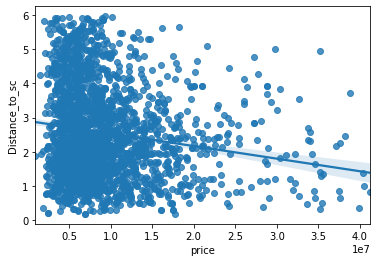

In [58]:
import seaborn as sns
# scatter plot with regression line
sns.regplot(df_reshape["price"], df_reshape["Distance_to_sc"])




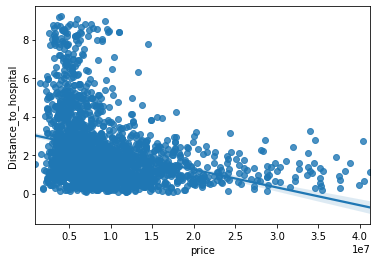

In [59]:
import seaborn as sns
# scatter plot with regression line
sns.regplot(df_reshape["price"], df_reshape["Distance_to_hospital"])




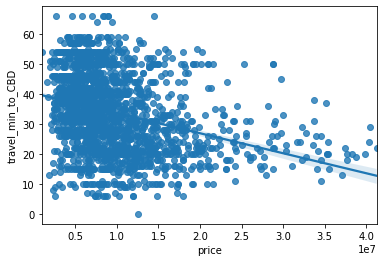

In [60]:
import seaborn as sns
# scatter plot with regression line
sns.regplot(df_reshape["price"], df_reshape["travel_min_to_CBD"])




From above graphs we get to see that the three columns have a negative correlation with the target column "price". This can be analysed from the regression line plotted in each graphs which tells us that while increasing the value of the predictor the value of price decreases. We can also see that the data points in the graphs are not evenly distributed across the regression line which causes an issue in the data. This would also cause problems while predicting new prices from the Linear Model. 

Now to check the Normality of all 4 columns we plot a histogram

### 5.2 CHECKING NORMALITY

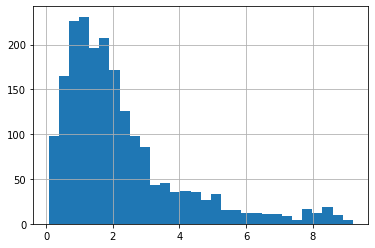

In [61]:
df_reshape["Distance_to_hospital"].hist(bins=30) 

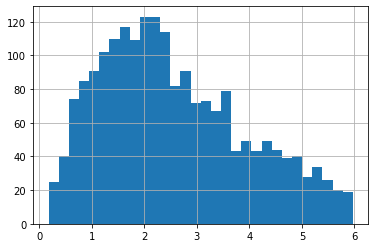

In [62]:
df_reshape["Distance_to_sc"].hist(bins=30) 

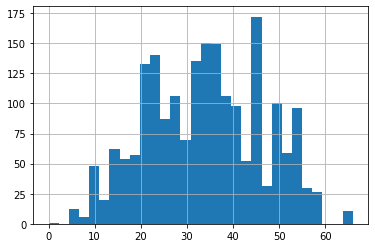

In [63]:
df_reshape["travel_min_to_CBD"].hist(bins=30) 

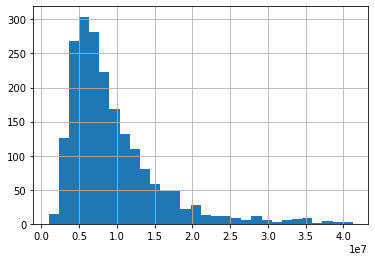

In [64]:
df_reshape["price"].hist(bins=30) 

The above histograms tells us about the skewness of the data. If the tail is towards the right then the column is right skewed. If the tail iis towards the left then the column is left skewed. And if the histogram forms a bell shape then we can say that the data is not skewed. 

From the above graohs we can see that Distance_to_hospital, Distance_to_sc and price are right skewed while the travel_to_min_CBD is unevenly skewed. 

Now to remove this skewness, we apply ceratin transformation techniques on the respective columns. 

We will apply the Power(or Square Power) Transformation on the columns - 

Distance_to_hospital

Distance_to_sc

price

This is beacuse when the data is right skewed we apply transformations such that the power is in decimals like square roots and less than 1. This is because it allows the data to be extracted such that the skeness decreases and hence the data becomes more normally distributed.

For the column travel_min_to_CBD we achieve a left skewed distribution. For such distributions we can apply either log or power trnsformations where power could be a number greater than or close to 1. This is because it allows the data to be extracted such that the skeness decreases and hence the data becomes more normally distributed.


Hence below we apply power transformations like 1/4,1/2,1/5 on the 3 columns and apply power transformtion like 1.2 on the travel_to_min_CBD column. This allows the skewness to decrease and hene the data becomes more normally distributed. 

In [65]:
import math

#transforming column values
df_reshape['new_Distance_to_hospital'] = None
i = 0
for row in df_reshape.iterrows():
    df_reshape['new_Distance_to_hospital'].at[i] = math.pow(df_reshape['Distance_to_hospital'][i],1/4)
    i += 1

df_reshape['new_Distance_to_sc'] = None
i = 0
for row in df_reshape.iterrows():
    df_reshape['new_Distance_to_sc'].at[i] = math.pow(df_reshape['Distance_to_sc'][i],1/2)
    i += 1

df_reshape['new_travel_min_to_CBD'] = None
j = 0
for row in df_reshape.iterrows():
    df_reshape['new_travel_min_to_CBD'].at[j] = math.pow(df_reshape['travel_min_to_CBD'][j],1.2)
    j += 1  
    


df_reshape['new_price'] = None
j = 0
for row in df_reshape.iterrows():
    df_reshape['new_price'].at[j] = math.pow(df_reshape['price'][j],1/5)
    j += 1

In [66]:
#Converting each column type to float below
df_reshape['new_Distance_to_hospital'] = df_reshape['new_Distance_to_hospital'].astype(float)
df_reshape['new_Distance_to_sc'] = df_reshape['new_Distance_to_sc'].astype(float)
df_reshape['new_travel_min_to_CBD'] = df_reshape['new_travel_min_to_CBD'].astype(float)
df_reshape['new_price'] = df_reshape['new_price'].astype(float)

Now we will plot the histograms again after we have applied the transformations. 

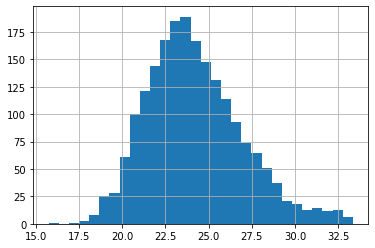

In [67]:
df_reshape["new_price"].hist(bins=30)

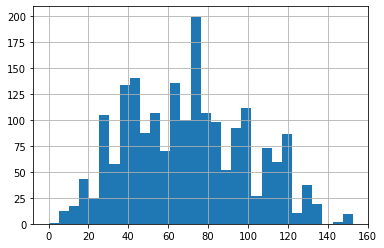

In [68]:
df_reshape["new_travel_min_to_CBD"].hist(bins=30)


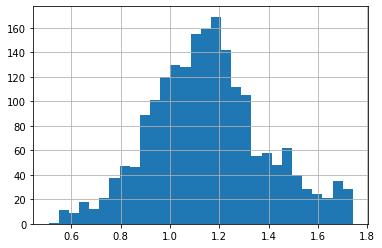

In [69]:
df_reshape["new_Distance_to_hospital"].hist(bins=30)

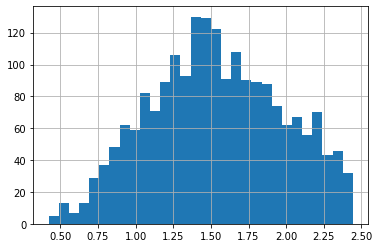

In [70]:
df_reshape["new_Distance_to_sc"].hist(bins=30)

Hence from the above graphs we can see that the histograms are now forming a bell shaped structure and hence the data have become more normally distributed. Hence after applying the ceratin power transformations we achieve good results in terms of the assumption Normalty. As a result now each column gets a fair chance and is used appropriately while creating the Linear Model. 

Now taking a look at the linearity we can plot the scatter plots and regression line as shown below

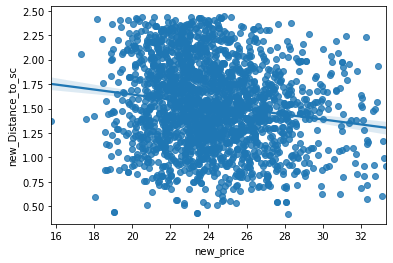

In [71]:
sns.regplot(df_reshape["new_price"], df_reshape["new_Distance_to_sc"])


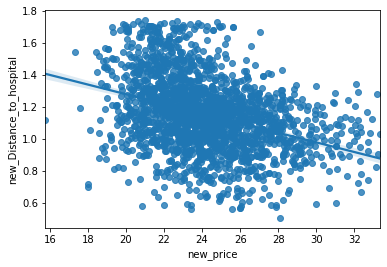

In [72]:
sns.regplot(df_reshape["new_price"], df_reshape["new_Distance_to_hospital"])


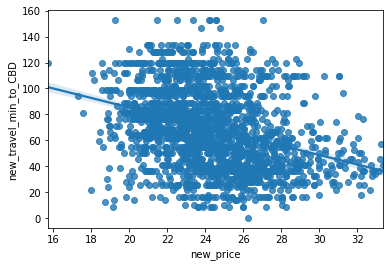

In [73]:
sns.regplot(df_reshape["new_price"], df_reshape["new_travel_min_to_CBD"])


For each graph above we can find that there is a negative corelation that exists between the preidctor and the target columns. After applying the transformations, the data points are more evenly spread across the regrssion line. As a result the data points are more towards the regression line and can be plotted across it. Hence an even distribution of the data points is seen. Hence this regression line best fits the data. This line is represented by 

y = ax1 + bx2 + cx3 + d,

where y is the target variable and x represents the different predictors and the a,b,c,d are the coefficient values. The more the points lie across this line the better the model wiill be. Hence after the above transformations we can see that the datapoints are now closely related to each other as well as closely located near the regression line.

Hence after applying these transformation techniques we have achieved better results of the predictors. Hence the normality and linearity are not better as can be seen from the histogram and scatter plots above. 

In [74]:
df_reshape.corr()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,new_Distance_to_hospital,new_Distance_to_sc,new_travel_min_to_CBD,new_price
Distance_to_sc,1.000000,0.262705,0.141150,-0.163523,0.146119,0.986793,0.262295,-0.166775
travel_min_to_CBD,0.262705,1.000000,0.350299,-0.319443,0.364007,0.236653,0.998931,-0.333872
Distance_to_hospital,0.141150,0.350299,1.000000,-0.310462,0.935898,0.129614,0.346711,-0.352913
price,-0.163523,-0.319443,-0.310462,1.000000,-0.321099,-0.160468,-0.317559,0.954166
new_Distance_to_hospital,0.146119,0.364007,0.935898,-0.321099,1.000000,0.139215,0.357287,-0.358310
new_Distance_to_sc,0.986793,0.236653,0.129614,-0.160468,0.139215,1.000000,0.236823,-0.159718
new_travel_min_to_CBD,0.262295,0.998931,0.346711,-0.317559,0.357287,0.236823,1.000000,-0.331651
new_price,-0.166775,-0.333872,-0.352913,0.954166,-0.358310,-0.159718,-0.331651,1.000000


Hence the columns new_price, new_Distance_to_hospital ,new_Distance_to_sc and new_travel_min_to_CBD are now better in terms of linearity and normality and we can see the correlation amongst them from the table above.  

### 5.3 CHECKING SCALING

Now to scale the data to a definite range we can choose ZScore Scaling or MinMax Scaling. Here I have used ZScore Normalisation as when the data is uniformally distributed and forms a bell shape histogram then we usually go for this approach. This is because after applying this approach the data points are centered across 0 with a standard deviation of 1. Hence to apply StandardScaler() we first fit the data columns into the fit function and then use the transform function on them. The resultant values rae the scaled version of the given columns and hence they can be used to create the final columns. 

### Z SCORE NORMALISATION

In [75]:
df_reshape.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,new_Distance_to_hospital,new_Distance_to_sc,new_travel_min_to_CBD,new_price
count,2011.000000,2011.000000,2011.000000,2.011000e+03,2011.000000,2011.000000,2011.000000,2011.000000
mean,2.555978,33.972650,2.230560,9.458477e+06,1.154781,1.536912,69.963717,24.189486
std,1.371296,12.693703,1.814706,6.072311e+06,0.232184,0.440428,30.603004,2.765808
min,0.177645,0.000000,0.066322,9.680000e+05,0.507474,0.421479,0.000000,15.746175
25%,1.488107,24.000000,0.995233,5.433000e+06,0.998806,1.219880,45.316201,22.233505
50%,2.318171,34.000000,1.712644,7.725000e+06,1.143976,1.522554,68.829514,23.855015
75%,3.487859,44.000000,2.768967,1.158250e+07,1.289969,1.867581,93.787123,25.867855
max,5.970655,66.000000,9.213572,4.125000e+07,1.742236,2.443492,152.564230,33.349152


As we are preparing the data for a linear model hence we can do scaling of the predictors and target. It is not mandatory as the Linear model handles the scales by taking different values of the coeeficient variable. But to give the predictors a fair chance we do scaling.

In [76]:
from sklearn import preprocessing

In [77]:
#fitting and transforming on StandardScaler()
std_scale = preprocessing.StandardScaler().fit(df_reshape[['new_Distance_to_hospital','new_Distance_to_sc','new_travel_min_to_CBD','new_price']])
df_std = std_scale.transform(df_reshape[['new_Distance_to_hospital','new_Distance_to_sc','new_travel_min_to_CBD','new_price']]) # an array not a df
df_std

array([[ 0.27849315, -0.30690519,  0.86245055,  0.2566044 ],
       [-0.00222669,  1.92475743,  0.20318341, -0.39591249],
       [-2.19975892, -0.64711294,  0.20318341,  0.03146952],
       ...,
       [-1.57950592, -0.53819376, -1.57703823,  1.20006723],
       [-0.84216611, -0.42533349, -1.23799261,  0.71240319],
       [-0.5124082 ,  0.14687876,  1.03114519, -0.27368794]])

In [78]:
df_reshape['Scaled_Distance_to_sc'] = df_std[:,0] # so 'Ascaled' is Alcohol scaled
df_reshape['Scaled_travel_min_to_CBD'] = df_std[:,1]
df_reshape['Scaled_Distance_to_hospital'] = df_std[:,2]
df_reshape['Scaled_price'] = df_std[:,3]# and 'MAscaled' is Malic acid scaled
df_reshape.head()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,new_Distance_to_hospital,new_Distance_to_sc,new_travel_min_to_CBD,new_price,Scaled_Distance_to_sc,Scaled_travel_min_to_CBD,Scaled_Distance_to_hospital,Scaled_price
0,1.964975,45,2.211175,9570000.0,1.219427,1.401776,96.350732,24.899028,0.278493,-0.306905,0.862451,0.256604
1,5.685446,37,1.775094,6570000.0,1.154265,2.384417,76.180193,23.094740,-0.002227,1.924757,0.203183,-0.395912
2,1.567444,37,0.172177,8432000.0,0.644160,1.251976,76.180193,24.276503,-2.199759,-0.647113,0.203183,0.031470
3,3.299223,23,0.731166,6852000.0,0.924707,1.816376,43.059938,23.289677,-0.991163,0.634688,-0.879341,-0.325414
4,4.739911,35,2.390968,9945000.0,1.243493,2.177134,71.265880,25.091173,0.382171,1.453999,0.042561,0.326093


In [79]:
df_reshape.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,new_Distance_to_hospital,new_Distance_to_sc,new_travel_min_to_CBD,new_price,Scaled_Distance_to_sc,Scaled_travel_min_to_CBD,Scaled_Distance_to_hospital,Scaled_price
count,2011.000000,2011.000000,2011.000000,2.011000e+03,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03
mean,2.555978,33.972650,2.230560,9.458477e+06,1.154781,1.536912,69.963717,24.189486,-5.443460e-16,2.342731e-16,2.913852e-16,4.973369e-16
std,1.371296,12.693703,1.814706,6.072311e+06,0.232184,0.440428,30.603004,2.765808,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00
min,0.177645,0.000000,0.066322,9.680000e+05,0.507474,0.421479,0.000000,15.746175,-2.788603e+00,-2.533242e+00,-2.286740e+00,-3.053506e+00
25%,1.488107,24.000000,0.995233,5.433000e+06,0.998806,1.219880,45.316201,22.233505,-6.719426e-01,-7.200067e-01,-8.055956e-01,-7.073763e-01
50%,2.318171,34.000000,1.712644,7.725000e+06,1.143976,1.522554,68.829514,23.855015,-4.655157e-02,-3.260772e-02,-3.707104e-02,-1.209605e-01
75%,3.487859,44.000000,2.768967,1.158250e+07,1.289969,1.867581,93.787123,25.867855,5.823909e-01,7.509785e-01,7.786599e-01,6.069788e-01
max,5.970655,66.000000,9.213572,4.125000e+07,1.742236,2.443492,152.564230,33.349152,2.530759e+00,2.058922e+00,2.699770e+00,3.312574e+00


Hence the new scaled columns now have mean = 0 and SD = 1

In [80]:
%matplotlib inline

(<matplotlib.axes._subplots.AxesSubplot at 0x20b4f745a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20b4f745a90>)

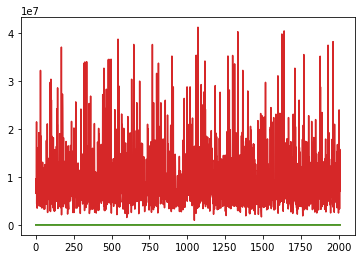

In [81]:
df_reshape["Distance_to_hospital"].plot(), df_reshape["Distance_to_sc"].plot(),df_reshape["travel_min_to_CBD"].plot(), df_reshape["price"].plot()

As all the columns have different scales hence it becomes difficult to plot all the 2013 points on the same graph. Hence to have a better visulisation we plot each individually.

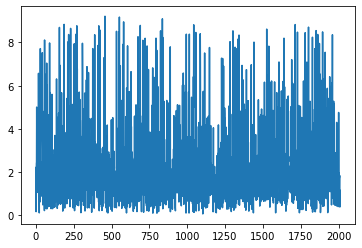

In [82]:
df_reshape["Distance_to_hospital"].plot() 

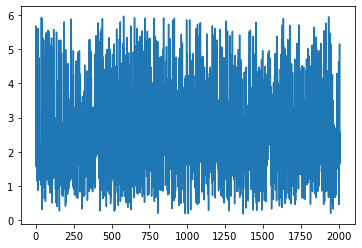

In [83]:
df_reshape["Distance_to_sc"].plot()

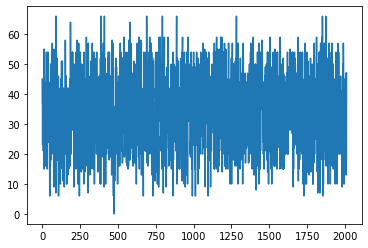

In [84]:
df_reshape["travel_min_to_CBD"].plot()

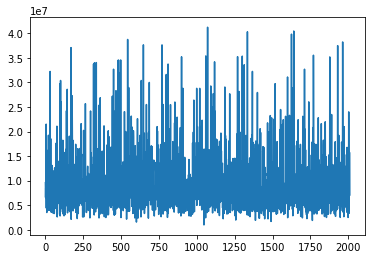

In [85]:
df_reshape["price"].plot()

Now after performing standard scaling we can see all the columns together in a single graph as they have been standardised and can be plotted on a similar y axis range

(<matplotlib.axes._subplots.AxesSubplot at 0x20b4fdc8f70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20b4fdc8f70>)

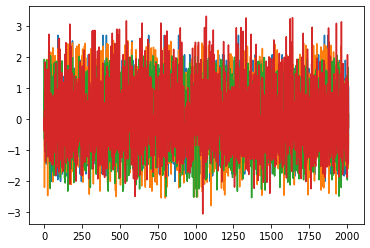

In [86]:
df_reshape["Scaled_Distance_to_hospital"].plot(), df_reshape["Scaled_Distance_to_sc"].plot(),df_reshape["Scaled_travel_min_to_CBD"].plot(), df_reshape["Scaled_price"].plot()

Z score scaling handles outliers as well which is not seen in MINMAX scaling. Hence the final columns become 

"Scaled_Distance_to_sc"

"Scaled_Distance_to_hospital"

"Scaled_travel_min_to_CBD"

"Scaled_price"

## 6. Summary
In this assignment we have learned how to handle and write files of different formats like pdf, json, xml, etc. We learned how to extract the data values from these files and create dataframes out of them. We also played around with the distance calculations to determine nearest shopping centers, train stations, etc to a particular property id based on the latitude and longitude points. We also learned how to determine direct trips between two train stations which also helped me to learn more about the Dataset. We also learned how to deal with shape files and determine whether a particular point lies within a suburb or not by creating polygons of the suburb. In this assignment we also learned how to reshape and transform data using log, power, sqrt techniques. Using these we transformed and scaled our data to present it well to the Linear model.